In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pip install plotly_express / conda install -c plotly plotly_express==0.4.0
import plotly_express as px
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from yellowbrick.cluster import silhouette_visualizer

# Part I Portfolio Exam

## Exercise 1
Conduct a brief initial analysis of the raw Dataset 𝐴.

In [5]:
# ingesting data

df = pd.read_csv('../11_portfolio1/portfolio_data_sose_2022_A.csv', sep=';', header=None)

In [6]:
df

,0,1
0,-3.588758,-21.838365
1,-4.217010,-2.694711
2,-3.505954,-36.163690
3,-4.239929,-27.574115
4,-5.082575,-21.729776
...,...,...
4245,7.534082,108.803451
4246,6.200962,95.231775
4247,3.073757,76.305227
4248,5.793074,109.842974


### Exercise 1.1
1. (1 point) How many different instances (rows) does the dataset contain?

In [7]:
print(f'Dataset A contains {df.shape[0]} instances (rows).') 

Dataset A contains 4250 instances (rows).


### Exercise 1.2
2. (1 points) How many features (columns) are in the dataset?

In [8]:
print(f'Dataset A contains {df.shape[1]} features (columns).')

Dataset A contains 2 features (columns).


### Exercise 1.3
3. (2 points) Determine each feature’s range.

In [9]:
def feature_range(f_min:float, f_max:float, feature):
    """Calculates range of two floats.

    Args:
        f_min (float): Minimum value for feature 
        f_max (float): Maximum value for feature
        feature (int): Column number 

    Returns:
        f_range (float): Prints the range for input parameters
    """
    f_min = df.min()[feature].item()
    f_max = df.max()[feature].item()
    f_range = f_max - f_min
    return f_range

In [10]:
# feature 0 min and max
f_min = df.min()[0].item()
f_max = df.max()[0].item()

print(f'Range of feature 1 is: {feature_range(f_min, f_max, 0)}')

# feature 1 min and max
f_min = df.min()[1].item()
f_max = df.max()[1].item()

print(f'Range of feature 2 is: {feature_range(f_min, f_max, 1)}')

Range of feature 1 is: 18.317296814053563
Range of feature 2 is: 231.8903471472952


### Exercise 1.4
4. (2 points) Determine each feature’s standard deviation.

In [11]:
# feature 0 standard deviation
f_std = df.std()[0].item()
print(f'Standard deviation of feature 1 is: {f_std}')

# feature 1 standard deviation
f_std = df.std()[1].item()
print(f'Standard deviation of feature 2 is: {f_std}')

Standard deviation of feature 1 is: 3.0804325980001397
Standard deviation of feature 2 is: 40.39486903854144


### Exercise 1.5
5. (2 points) Plot the data in a scatter plot.

In [12]:
px.scatter(df, x=0, y=1, title='Scatter Plot for Dataset A', 
            height=640, width=720, labels={'0': 'Feature 1', '1': 'Feature 2'})

## Exercise 2

### Exercise 2.1

1. (14 points) On the raw Dataset 𝐴, compute k-Means clusterings of the dataset for different choices of 𝑘 : 2, 3, . . . , 10. For each 𝑘 compute the silhouette coefficient and plot them against 𝑘 in a diagram. Describe and interpret the diagram!

In [13]:
def kmeans_sil_coef_plot(X):
    """Plots the silhouette coefficient for k from 2 to 10 and plots it against k.

    Args:
        X (array): n*2 array

    Returns:
        Line plot of the silhouette coefficient against k.
    """
    k_results = []
    for i in range(2, 11):
        kmeans_random = KMeans(
            n_clusters=i, 
            random_state=1, 
            n_init=20, 
            init='random',  # the only difference: Random initialization instead of k-means++
            max_iter=300, tol=0.0001)
        k_results.append(kmeans_random.fit_predict(X))
    
    s_c_values = []
    for i in range(len(k_results)):
        s_c_values.append(sklearn.metrics.silhouette_score(X, k_results[i]))
    fig = px.line(x=range(2, 11), y=s_c_values, title='Silhouette Coefficient against k', 
                    height=640, width=720, labels={'x': 'k', 'y': 'silhouette coefficient'})
    return fig


In [14]:
def column_stacker(df):
    """Turns a dataframe into 2-D arrays which are stacked. 

    Args:
        df (dataframe): Takes a two column dataframe.
    """
    x = df.iloc[:, 0].values
    y = df.iloc[:, 1].values
    X = np.column_stack((x, y))
    return X

In [15]:
X = column_stacker(df)

In [16]:
kmeans_sil_coef_plot(X)

Results:
- k=2 has the highest silhouette coefficient, so we will continue with that
- sc of k=2 and k=3 are above 0.7
- sc of k=5 is higher than of k=4 which is curious
- not even sc of k=10 is lower than 0.5

There is a trend as the value for k increases the silhouette coefficient decreases.

Rule fo thumb:
- silhouette coefficient > 0.7: strong structure
- silhouette coefficient < 0.5: unusable structure

Intuition: silhouette coefficient of k=3 and k=5 shouldn't be higher than silhouette coefficient of k=4 because I can look at the scatter plot and discern 4 clusters.

### Exercise 2.2

2. (8 points) Choose 𝑘 according to your result in 2.1 and plot the data in a scatter plot! Visualize the clustering using colors! Additionally visualize the cluster centers in the diagram!

In [17]:
def print_clustering(X, cluster_centers, cluster_assignments, **kwargs):
    if not isinstance(X, pd.DataFrame):
        df = pd.DataFrame(X)
    else:
        raise NotImplementedError('This function is not yet implemented for dataframe inputs.')

    df['Cluster'] = cluster_assignments
    df['Cluster'] = df['Cluster'].map(str)
    df['symbol'] = 'circle'     # marker symbol
    df['size'] = 1              # size for marker symbol

    df_cluster_centers = pd.DataFrame(cluster_centers)
    df_cluster_centers['Cluster'] = 'cluster centers'
    df_cluster_centers['symbol'] = 'star'
    df_cluster_centers['size'] = 5

    df = pd.concat([df, df_cluster_centers])

    kwargs.update({
        'height': 640,
        'width': 720,
        'opacity': 1})

    df = df.sort_values('Cluster')
    fig = px.scatter(df, x=0, y=1,
                     color='Cluster',
                     color_discrete_map={'0': 'darkorange', '1': 'darkmagenta', '2': 'dodgerblue', '3': 'darkgreen', 'cluster centers': 'black'},
                     symbol='symbol',
                     symbol_map='identity',
                     size='size',
                     **kwargs)

    return fig

In [18]:
# choosing k=2
n_clusters=2
kmeans_random_2c = KMeans(
    n_clusters=n_clusters, 
    random_state=1, 
    n_init=20, 
    init='random',  # the only difference: Random initialization instead of k-means++
    max_iter=300, tol=0.0001)
cluster_assignments = kmeans_random_2c.fit_predict(X)

In [19]:
print_clustering(
        X,
        cluster_centers=kmeans_random_2c.cluster_centers_,
        cluster_assignments=cluster_assignments,
        title='Scatter Plot for Dataset A',
        labels={'0': 'Feature 1', '1': 'Feature 2'})

### Exercise 2.3

3. (4 points) Compare the resulting clustering to your intuition from looking at the data! Is the resulting clustering meaningful? Does the chosen 𝑘 fit you intuition?

- from looking at the scatter plot I would have choosen k=4 for the four clusters I can see
- though the best result when computing the silhouette coefficient for k from 2 to 10 was k=2
- when clustering with k-means using k=2 we get a band shaped horizontal clustering with "best fit" cluster center
- what we really would like to see is k=4 and each cluster center neatly positioned in the actual center of their respective clusters

### Exercise 2.4

4. (7 points) Explain the issue with the dataset that led to this clustering! Did the clustering coefficient suggest a good or a bad clustering structure? Is the issue a problem with the silhouette coefficient, the clustering method, or the data modeling? Suggest and implement a fix for the issue!

- assuming the silhouette coefficient for k=2 had scored highest we would expect a good clustering structure, which we did not receive
- the silhouette coefficient and the clustering method aren't the problem in this case
- the standard deviation of feature 2 is around 13 times higher than the standard deviation of feature 1
- accordingly, we ought to standardize the data before we do further computation on it

In [20]:
# standardizing the data
scaler = StandardScaler()
dfs = scaler.fit_transform(df)
dfs = pd.DataFrame(dfs, index=df.index, columns=df.columns)
df = dfs

### Exercise 2.5

5. (5 points) Conduct the same steps as in 2.1 and 2.2 for the data resulting from 2.4. Again, compare your intuition to the result.

In [21]:
X = column_stacker(df)

In [22]:
kmeans_sil_coef_plot(X)

In [23]:
# choosing k=4
n_clusters = 4
kmeans_random_4c = KMeans(
    n_clusters=n_clusters, 
    random_state=1, 
    n_init=20, 
    init='random',  # the only difference: Random initialization instead of k-means++
    max_iter=300, tol=0.0001)
cluster_assignments = kmeans_random_4c.fit_predict(X)

In [24]:
print_clustering(
    scaler.inverse_transform(X),
    cluster_centers=scaler.inverse_transform(kmeans_random_4c.cluster_centers_),
    cluster_assignments=cluster_assignments,
    title='Scatter Plot for Dataset A', labels={'0': 'Feature 1', '1': 'Feature 2'})

- when computing the silhouette coefficient for k from 2 to 10 after the data was standardized the highest score is for k=4
- which is in line with our intuition when looking at the first scatter plot
- when computing k-Means with k=4, we get a clustering like we would expect
- the result is acceptable though there is some mislabeling: 
    - points ascribed to cluster 1 (purple) that belong to cluster 3 (green)
    - points ascribed to cluster 1 (purple) that belong to cluster 0 (orange)
    - points ascribed to cluster 2 (blue) that belong to cluster 0 (orange)

## Exercise 3
In the following experiments, we process the Dataset 𝐵.

### Exercise 3.1
1. (6 points) On the raw Dataset 𝐵, compute k-means clusterings of the dataset for different choices of 𝑘 : 2, 3, . . . , 10. For each 𝑘 compute the inertia of the resulting clustering and plot it against 𝑘 in a diagram. Describe and interpret the diagram!

In [25]:
# ingesting data
df = pd.read_csv('../11_portfolio1/portfolio_data_sose_2022_B.csv', sep=';', header=None)

# renaming columns
df.rename(columns = {0: 'Feature 1', 1: 'Feature 2'}, inplace = True)

# keeping a copy of the original data
df_raw = df.copy()

# standardizing the data
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# creating X
X = column_stacker(df)

In [26]:
def k_means_inertia_plot(X):
    """Plots the ineratia  for k from 2 to 10 and plots it against k

    Args:
        X (_type_): n*2 array

    Returns:
        A line plot of inertia values against k.
    """
    k_results = []
    inertia_values = []
    for i in range(2, 11):
        kmeans_random = KMeans(
        n_clusters=i, 
        random_state=1, 
        n_init=20, 
        init='random',  # the only difference: Random initialization instead of k-means++
        max_iter=300, tol=0.0001)
        k_results.append(kmeans_random.fit_predict(X))
        inertia_values.append(kmeans_random.inertia_)
    fig = px.line(x=range(2, 11), y=inertia_values, title='Cluster Inertia against k',
                    height=640, width=720, labels={'x': 'k', 'y': 'cluster inertia'})

    return fig 

In [27]:
k_means_inertia_plot(X)

Oberservations:
- when ploting the inertia values against k we find the lower the value for k the higher the inertia score
- this makes sense since it becomes easier for k-Means to find cluster centers when there are more clusters
- the extreme of this would be to say k is equal to number of points in the dataset
- then each point would be it's own cluster and cluster center

### Exercise 3.2
2. (2 points) In you own words, explain the idea of the elbow method!

The Elbow Method:
- is based on the sum of squared distances between each point and its assigned cluster center
- to plot the elbow method the x axis will be ascribed to k and the y axis will ascribed to sum of squared distances
- to choose the right k from this we need find the line's inflection point or where the line has the highest curvature

### Exercise 3.3
3. (0 points) Familiarize yourself with the Python module kneed2 and find a way to automatically determine the elbow of a curve.

In [28]:
# https://pypi.org/project/kneed/#documentation

### Exercise 3.4

4. (5 points) Compute the best 𝑘 according to the elbow method using kneed!

In [29]:
def k_means_inertia_val(X):
    """Computes ineratia value for X with k from 2 to 10.

    Args:
        X (array): n*2 array

    Returns:
        A list with the inertia values.
    """
    k_results = []
    inertia_values = []
    for i in range(2, 11):
        kmeans_random = KMeans(
        n_clusters=i, 
        random_state=1, 
        n_init=20, 
        init='random',  # the only difference: Random initialization instead of k-means++
        max_iter=300, tol=0.0001)
        k_results.append(kmeans_random.fit_predict(X))
        inertia_values.append(kmeans_random.inertia_)
    return inertia_values

In [30]:
inertia_values = k_means_inertia_val(X)

In [31]:
kneedle = KneeLocator(x=range(2, 11), y=inertia_values, S=1.0, curve="convex", direction="decreasing")

print(f'According to the KneeLocator the best value for k = {round(kneedle.knee, 3)}')

According to the KneeLocator the best value for k = 4


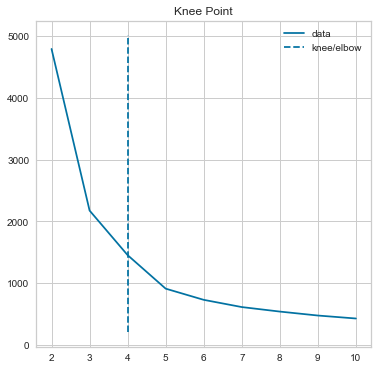

In [32]:
kneedle.plot_knee()

### Exercise 3.5

5. (2 points) Determine the best choice of 𝑘 by reading it from a silhouette plot like in 2.1 as well
and compare it to your result of 3.4.

Both the knee point plot and the silhouette coefficient plot suggest k = 4 as the best choice

### Exercise 3.6

6. (2 points) Choose 𝑘 according to your result in 3.4 and plot the data in a scatter plot! Visualize the clustering using colors! Additionally visualize the cluster centers in the diagram!

In [33]:
n_clusters = int(round(kneedle.knee, 3))
kmeans_random = KMeans(
    n_clusters=n_clusters, 
    random_state=1, 
    n_init=20, 
    init='random',  # the only difference: Random initialization instead of k-means++
    max_iter=300, tol=0.0001)
cluster_assignments = kmeans_random.fit_predict(X)

In [34]:
print_clustering(
    scaler.inverse_transform(X),
    cluster_centers=scaler.inverse_transform(kmeans_random.cluster_centers_),
    cluster_assignments=cluster_assignments,
    title='Scatter Plot for Dataset B', labels={'0': 'Feature 1', '1': 'Feature 2'})

### Exercise 3.7

7. (8 points) Create and interpret the silhouette plot for the clustering from 3.6.

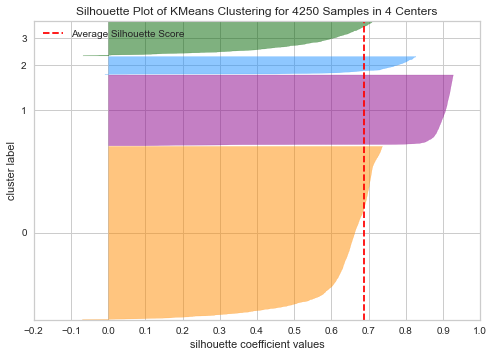

In [35]:
silhouette_visualizer(kmeans_random, X, colors=['darkorange', 'darkmagenta', 'dodgerblue', 'darkgreen']);

- a score of 1 means the points of a given cluster are very close together and far away from the other clusters
- the average silhouette coefficient is close to 0.7 indicating strong structure for all clusters
- the most compact and most distant to other clusters is cluster 1 (purple)
- the least compact and least distant to other clusters is cluster 3 (green)
- for green and orange and to some smaller extend for blue we also see some points with values below zero, these are points which are closer on average to points in another cluster than to points their own cluster

### Exercise 3.8

8. (8 points) For the clustering from 3.6, for each feature, plot the distribution of the feature in each cluster! Summarize the results about the 𝑘 groups.

In [36]:
# concatenating the copy of the original data with cluster_assignments and renaming the column to 'Cluster'
df_viz = pd.concat([df_raw, pd.DataFrame(cluster_assignments, columns=['Cluster'])], axis=1)

# sorting the dataframe by 'Cluster'
df_viz = df_viz.sort_values('Cluster')

# converting 'Cluster' values to string
df_viz['Cluster'] = df_viz['Cluster'].map(str)

In [37]:
fig = px.scatter(df_viz, x='Feature 1', y='Feature 2', color='Cluster',
                marginal_x="histogram", marginal_y="histogram",
                color_discrete_sequence=['darkorange', 'darkmagenta', 'dodgerblue','darkgreen'],
                title='Feature Distribution per Cluster',
                height=640, width=720)
fig.show()

In [38]:
df_viz['Cluster'].value_counts()

0    2491
1    1018
3     487
2     254
Name: Cluster, dtype: int64

- Cluster 0 (orange): 
    - the cluster has 2491 points
    - the second largest spread and the highest density
    - it also has two peaks which indicates two or four overlapping sub-clusters
- Cluster 1 (purple): 
    - the cluster has 1018 points
    - the lowest spread and the second highest density
- Cluster 2 (blue): 
    - the cluster has 487 points
    - the second lowest spread and the second lowest density
- Cluster 3 (green):
    - the cluster has 254 points
    - the largest spread and the lowest density

## Exercise 4.
In this task, sketch the mathematical steps you need to take for the representations of the lines.

### Exercise 4.1 
1. (2 points) Compute and visualize a 𝑘-Means clustering for Dataset 𝐶 with 𝑘 = 2. Plot the data in a scatter plot! Visualize the clustering using colors! Additionally visualize the cluster centers in the diagram!

In [39]:
# ingesting data
df = pd.read_csv('../11_portfolio1/portfolio_data_sose_2022_C.csv', sep=';', header=None)

# renaming columns
df.rename(columns = {0: 'Feature 1', 1: 'Feature 2'}, inplace = True)

# keeping a copy of the original data
df_raw = df.copy()

# standardizing the data
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

# creating X
X = column_stacker(df)

In [40]:
kmeans_random = KMeans(
    n_clusters=2, 
    random_state=1, 
    n_init=20, 
    init='random',  # the only difference: Random initialization instead of k-means++
    max_iter=300, tol=0.0001)
cluster_assignments = kmeans_random.fit_predict(X)

In [41]:
fig1 = print_clustering(
    scaler.inverse_transform(X),
    cluster_centers=scaler.inverse_transform(kmeans_random.cluster_centers_),
    cluster_assignments=cluster_assignments,
    title='Scatter Plot for Dataset C', labels={'0': 'Feature 1', '1': 'Feature 2'})
fig1.show()

### Exercise 4.2

2. (7 points) Consider a line in ***R^2*** given through the vector equation <𝑥, 𝑤> + 𝑏 = 0 with 𝑥 ∈ ***R^2***, 𝑤 = [5, 6] , and 𝑏 = 11. 

Add the resulting line into the diagram of 4.1. If you take intermediate steps to express the line in another form, include them in the notebook.

In [42]:
import plotly.graph_objects as go

$$ <\vec{x}, \vec{w}> + b = 0 $$
$$ \vec{x} \cdot \vec{w} + b = 0 $$
$$ (x_1, \, x_2) \cdot (5, \, 6) + 11 = 0 $$
$$ 5x_1, \, + \, 6x_2 + 11 = 0$$
$$ 5x_1, \, + \, 6x_2 = - 11  $$
$$ 6x_2 = - 5x_1 - 11 $$
$$ x_2 = \frac{-5}{6} x_1 - \frac{11}{6} $$

In [43]:
x=np.arange(-8, 1, 0.5)
fig1.add_trace(go.Scatter(y=((-5 / 6) * x - (11 / 6)), x=x,
                          mode='lines',
                          name='Line 1'))

### Exercise 4.3

3. (7 points) Consider another line given through the following information:
- the vector 𝑢_0 = [-7, 6] is on the line and
- the vector 𝑤 = [10, 12] is orthogonal to the line.

Add the resulting line into the diagram of 4.1. If you take intermediate steps to express the line in another form, include them in the notebook.

$$ <\vec{v} \,- \vec{u_o}, \, \vec{w}> \,= \,0 $$
$$ (\vec{v} \,-\, \vec{u_o}) \cdot \vec{w} = 0 $$
$$ \vec{v} \,\cdot\, \vec{w} - \vec{u_o} \,\cdot\, \vec{w} = 0 $$
$$ \vec{v} \,\cdot\, \vec{w} = \vec{u_o} \,\cdot\, \vec{w} $$
$$ (\vec{v_1} \,,\, \vec{v_2}) \,\cdot\, (10, \, 12) = (-7, \, 6) \,\cdot\, (10, \, 12) $$
$$ (10\vec{v_1} \, + \, 12\vec{v_2}) \, = -70 \, + \, 72 $$
$$ 12\vec{v_2} \, = -10\vec{v_1} \, + \, 2 $$
$$ \vec{v_2} \, = \frac{-10}{12}\vec{v_1} \, + \,\frac{2}{12} $$
$$ \vec{v_2} \, = \frac{-5}{6}\vec{v_1} \, + \,\frac{1}{6} $$

In [44]:
fig1.add_trace(go.Scatter(y=((-5 / 6) * x + (1 / 6)), x=x,
                          mode='lines',
                          name='Line 2'))

### Exercise 4.4

4. (3 points) Discuss the relation of the two lines of 4.2 and 4.3 to each other and to the clustered dataset!

- line 1 and line 2 are parallel to each other
- line 1 divides the two clusters almost equidistant
- line 2 borders on cluster 1 excluding three points
- if line 2 was moved any further on the orthogonal axis of line 1 it would start cutting into cluster 1 more

## Exercise 4.3 (alternative?)

Were we supposed to draw the decision boundry between the two clusters? If so the provided values were wrong.

The boundry line between the two clusters is orthogonal to the vector from center point of cluster 0 to the center point of cluster 1. This vector is called $ \vec{w} $.

$ \vec{u_0} $ is the half way point between the center points of the two clusters.

$$ \vec{w} = (3, \, 5) $$
$$ \vec{u_0} = (-3.5, \, 0.5 ) $$
$$ b = -<\vec{u_0},\, \vec{w}>\, = 8 $$

In [45]:
fig1 = print_clustering(
    scaler.inverse_transform(X),
    cluster_centers=scaler.inverse_transform(kmeans_random.cluster_centers_),
    cluster_assignments=cluster_assignments,
    title='Scatter Plot for Dataset C', labels={'0': 'Feature 1', '1': 'Feature 2'})

fig1.add_trace(go.Scatter(y=((-8 / 5) - (3 / 5) * x), x=x,
                          mode='lines',
                          name='Line 1'))

fig1.add_trace(go.Scatter(y=((-8 / 5) - (3 / 5) * x), x=x,
                          mode='lines',
                          name='Line 2',
                          line=dict(color='black')))